In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("E:\FMCG_Cleaned_Data.xlsx")

In [3]:
df.head(5)

,invoice_no,payment_mode,cash_invoice,invoice_date,invoice_status,customer_code,customer_name,state,market_id,market_name,...,sgst_amt,igst_rate,igst_amt,cess_rate,cess_amt,add_cess_rate,add_cess_amt,total_amount,amount_check,amount_difference
0,I/24-25/015848,Cash,No,2025-01-04,Invoiced,21BCUS9931,SRI LAKSHMI EGGS,Andhra Pradesh,10194608,PALASA KASIBUGGA (M),...,2.2853,0,0,0,0.0000,0,0.0,95.9822,95.9822,0.0
1,I/24-25/016451,Cash,No,2025-01-13,Invoiced,21BSFA102400019,laitha pan shop 231024,Andhra Pradesh,10196052,METTURU,...,1.4009,0,0,0,0.0000,0,0.0,58.8370,58.8370,0.0
2,I/24-25/015723,Credit,Yes,2025-01-01,Invoiced,21BCUS1222,SWAMI AYYAPA KIRANA,Andhra Pradesh,10199561,CHEEPURAPALLE,...,1.8572,0,0,0,0.0000,0,0.0,78.0010,78.0010,0.0
3,I/24-25/016034,Credit,Yes,2025-01-07,Invoiced,21BCUS1225,JAMI.KISHORE,Andhra Pradesh,10197375,GOPPILI,...,1.8572,0,0,0,0.0000,0,0.0,78.0010,78.0010,0.0
4,I/24-25/016918,Credit,Yes,2025-01-25,Invoiced,21BCUS470,VASVI PANSHOP,Andhra Pradesh,10194608,PALASA KASIBUGGA (M),...,657.4372,0,0,36,1690.5528,4170,4170.0,11871.4072,11871.4072,0.0


In [14]:
# 1. Basic shape and info
print('Shape:', df.shape)
print(df.info())

Shape: (90866, 41)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90866 entries, 0 to 90865
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   invoice_no         90866 non-null  object        
 1   payment_mode       90866 non-null  object        
 2   cash_invoice       90866 non-null  object        
 3   invoice_date       90866 non-null  datetime64[ns]
 4   invoice_status     90866 non-null  object        
 5   customer_code      90866 non-null  object        
 6   customer_name      90866 non-null  object        
 7   state              90866 non-null  object        
 8   market_id          90866 non-null  int64         
 9   market_name        90866 non-null  object        
 10  salesman           90866 non-null  object        
 11  salesman_type      90866 non-null  object        
 12  beat               90866 non-null  object        
 13  category           90866 non-null  object 

In [16]:
print("="*80)
print("Descriptive statistics for numerical columns")
print("="*80)

Descriptive statistics for numerical columns


In [15]:
# 2. Descriptive statistics for numerical columns
num_cols = ['qty','unit_price','gross_amount','discount_amt',
            'taxable_value','total_amount','tax_total']
print(df[num_cols].describe().round(2))


            qty  unit_price  gross_amount  discount_amt  taxable_value  \
count  90866.00    90866.00      90866.00      90866.00       90866.00   
mean       5.54      640.57        817.04          0.94         776.51   
std       26.57     1361.30       1703.80         13.45        1601.17   
min        0.00       16.00          3.77          0.00           2.03   
25%        0.27      137.43         91.72          0.00          87.74   
50%        0.64      236.34        186.15          0.00         180.48   
75%        3.60      401.78        895.17          0.00         845.61   
max     2250.00     7000.00      53321.62        588.49       46501.79   

       total_amount  tax_total  
count      90866.00   90866.00  
mean        1049.99     273.48  
std         2448.78    1162.07  
min            2.39       0.00  
25%           96.31       7.27  
50%          203.11      16.60  
75%          982.81      90.87  
max        86944.50   48168.58  


In [22]:
print("*"*80)
print("Univariate Analysis — Distributions")
print("*"*80)

********************************************************************************
Univariate Analysis — Distributions
********************************************************************************


In [21]:
print("="*80)
print("A. Revenue Distribution by Category")
print("="*80)

A. Revenue Distribution by Category


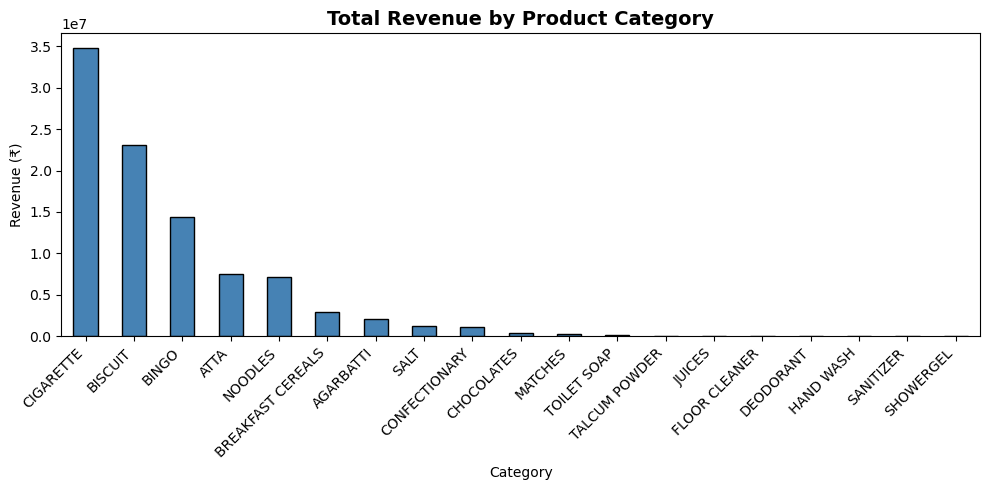

In [24]:
category_rev = df.groupby('category')['total_amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
category_rev.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Total Revenue by Product Category', fontsize=14, fontweight='bold')
plt.xlabel('Category')
plt.ylabel('Revenue (₹)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('category_revenue.png', dpi=150)
plt.show()


In [25]:
print("="*80)
print("B. Monthly Revenue Trend (Line Chart)")
print("="*80)

B. Monthly Revenue Trend (Line Chart)


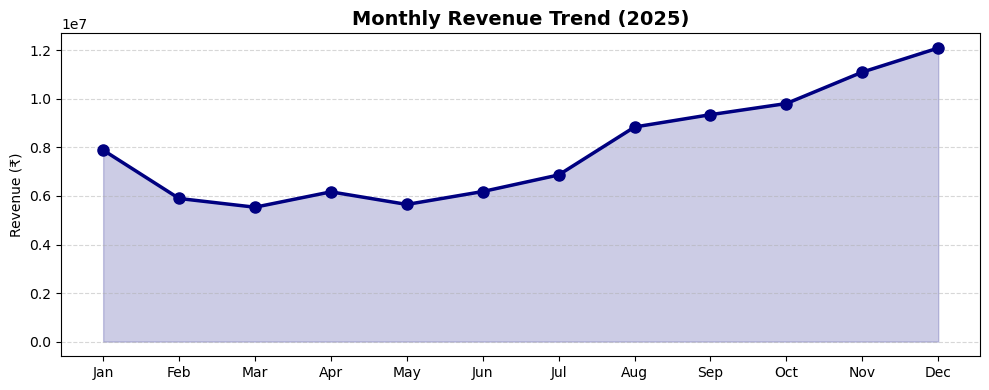

In [27]:
df['month'] = df['invoice_date'].dt.month
monthly_rev = df.groupby('month')['total_amount'].sum()

month_labels = ['Jan','Feb','Mar','Apr','May','Jun',
                'Jul','Aug','Sep','Oct','Nov','Dec']

plt.figure(figsize=(10, 4))
plt.plot(monthly_rev.index, monthly_rev.values, marker='o',
         linewidth=2.5, color='navy', markersize=8)
plt.fill_between(monthly_rev.index, monthly_rev.values, alpha=0.2, color='navy')
plt.xticks(monthly_rev.index, month_labels)
plt.title('Monthly Revenue Trend (2025)', fontsize=14, fontweight='bold')
plt.ylabel('Revenue (₹)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('monthly_trend.png', dpi=150)
plt.show()


In [30]:
print("="*80)
print("C. Payment Mode Distribution (Pie/Bar Chart)")
print("="*80)

C. Payment Mode Distribution (Pie/Bar Chart)


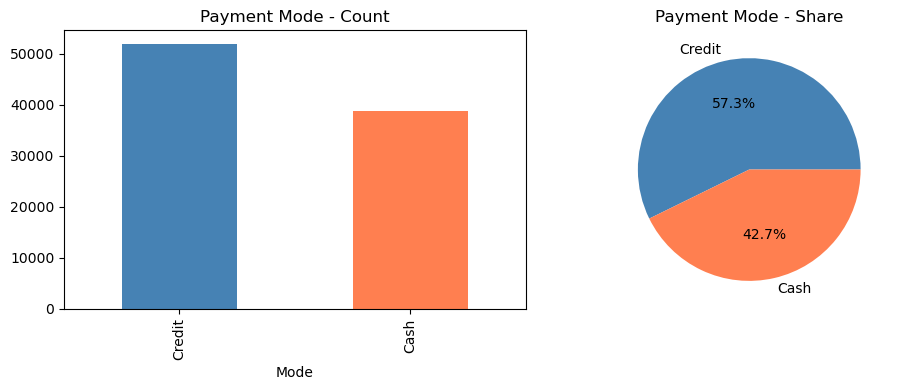

In [32]:
payment_dist = df['payment_mode'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Bar chart
payment_dist.plot(kind='bar', ax=axes[0], color=['steelblue','coral'])
axes[0].set_title('Payment Mode - Count')
axes[0].set_xlabel('Mode')

# Pie chart
axes[1].pie(payment_dist, labels=payment_dist.index,
            autopct='%1.1f%%', colors=['steelblue','coral'])
axes[1].set_title('Payment Mode - Share')
plt.tight_layout()
plt.savefig('payment_mode.png', dpi=150)
plt.show()


In [35]:
print("="*80)
print("Invoice Status Distribution")
print("="*80)

Invoice Status Distribution


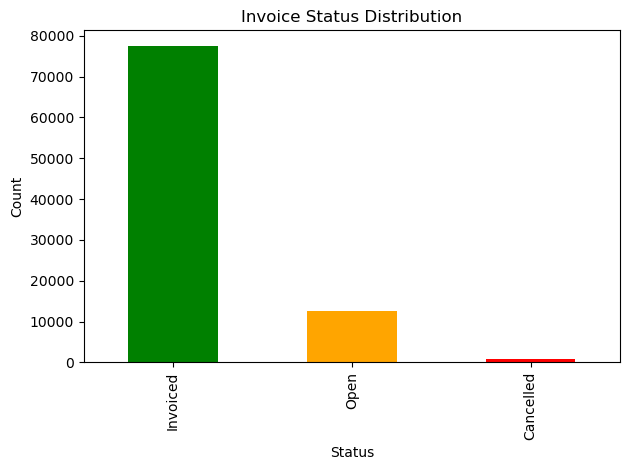

In [36]:
status_dist = df['invoice_status'].value_counts()
status_dist.plot(kind='bar', color=['green','orange','red'])
plt.title('Invoice Status Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('invoice_status.png', dpi=150)
plt.show()


In [6]:
df.head(5)

,invoice_no,payment_mode,cash_invoice,invoice_date,invoice_status,customer_code,customer_name,state,market_id,market_name,...,sgst_amt,igst_rate,igst_amt,cess_rate,cess_amt,add_cess_rate,add_cess_amt,total_amount,amount_check,amount_difference
0,I/24-25/015848,Cash,No,2025-01-04,Invoiced,21BCUS9931,SRI LAKSHMI EGGS,Andhra Pradesh,10194608,PALASA KASIBUGGA (M),...,2.2853,0,0,0,0.0000,0,0.0,95.9822,95.9822,0.0
1,I/24-25/016451,Cash,No,2025-01-13,Invoiced,21BSFA102400019,laitha pan shop 231024,Andhra Pradesh,10196052,METTURU,...,1.4009,0,0,0,0.0000,0,0.0,58.8370,58.8370,0.0
2,I/24-25/015723,Credit,Yes,2025-01-01,Invoiced,21BCUS1222,SWAMI AYYAPA KIRANA,Andhra Pradesh,10199561,CHEEPURAPALLE,...,1.8572,0,0,0,0.0000,0,0.0,78.0010,78.0010,0.0
3,I/24-25/016034,Credit,Yes,2025-01-07,Invoiced,21BCUS1225,JAMI.KISHORE,Andhra Pradesh,10197375,GOPPILI,...,1.8572,0,0,0,0.0000,0,0.0,78.0010,78.0010,0.0
4,I/24-25/016918,Credit,Yes,2025-01-25,Invoiced,21BCUS470,VASVI PANSHOP,Andhra Pradesh,10194608,PALASA KASIBUGGA (M),...,657.4372,0,0,36,1690.5528,4170,4170.0,11871.4072,11871.4072,0.0


In [8]:
import pandas as pd
import mysql.connector


In [11]:
df = pd.read_excel("E:\FMCG_Cleaned_Data.xlsx")

In [12]:
# Rename column (MySQL compatible)
df.rename(columns={"sub-category": "sub_category"}, inplace=True)

In [13]:
df.head()

,invoice_no,payment_mode,cash_invoice,invoice_date,invoice_status,customer_code,customer_name,state,market_id,market_name,...,sgst_amt,igst_rate,igst_amt,cess_rate,cess_amt,add_cess_rate,add_cess_amt,total_amount,amount_check,amount_difference
0,I/24-25/015848,Cash,No,2025-01-04,Invoiced,21BCUS9931,SRI LAKSHMI EGGS,Andhra Pradesh,10194608,PALASA KASIBUGGA (M),...,2.2853,0,0,0,0.0000,0,0.0,95.9822,95.9822,0.0
1,I/24-25/016451,Cash,No,2025-01-13,Invoiced,21BSFA102400019,laitha pan shop 231024,Andhra Pradesh,10196052,METTURU,...,1.4009,0,0,0,0.0000,0,0.0,58.8370,58.8370,0.0
2,I/24-25/015723,Credit,Yes,2025-01-01,Invoiced,21BCUS1222,SWAMI AYYAPA KIRANA,Andhra Pradesh,10199561,CHEEPURAPALLE,...,1.8572,0,0,0,0.0000,0,0.0,78.0010,78.0010,0.0
3,I/24-25/016034,Credit,Yes,2025-01-07,Invoiced,21BCUS1225,JAMI.KISHORE,Andhra Pradesh,10197375,GOPPILI,...,1.8572,0,0,0,0.0000,0,0.0,78.0010,78.0010,0.0
4,I/24-25/016918,Credit,Yes,2025-01-25,Invoiced,21BCUS470,VASVI PANSHOP,Andhra Pradesh,10194608,PALASA KASIBUGGA (M),...,657.4372,0,0,36,1690.5528,4170,4170.0,11871.4072,11871.4072,0.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90866 entries, 0 to 90865
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   invoice_no         90866 non-null  object        
 1   payment_mode       90866 non-null  object        
 2   cash_invoice       90866 non-null  object        
 3   invoice_date       90866 non-null  datetime64[ns]
 4   invoice_status     90866 non-null  object        
 5   customer_code      90866 non-null  object        
 6   customer_name      90866 non-null  object        
 7   state              90866 non-null  object        
 8   market_id          90866 non-null  int64         
 9   market_name        90866 non-null  object        
 10  salesman           90866 non-null  object        
 11  salesman_type      90866 non-null  object        
 12  beat               90866 non-null  object        
 13  category           90866 non-null  object        
 14  sub_ca

In [15]:
# Convert date column
df['invoice_date'] = pd.to_datetime(df['invoice_date']).dt.date

In [16]:
# ---------- MYSQL CONNECTION ----------
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="AJAY",
    database="fmcg_db"
)

cursor = conn.cursor()

# ---------- INSERT QUERY ----------
cols = ",".join(df.columns)
placeholders = ",".join(["%s"] * len(df.columns))

sql = f"INSERT INTO fmcg_sales ({cols}) VALUES ({placeholders})"

# Convert dataframe → tuples
data = [tuple(row) for row in df.to_numpy()]

# Bulk insert (FAST)
cursor.executemany(sql, data)

conn.commit()

print("✅ Data imported successfully!")

cursor.close()
conn.close()

✅ Data imported successfully!


In [5]:
print("="*80)
print("Multivariate Analysis & Correlation")
print("="*80)

Multivariate Analysis & Correlation


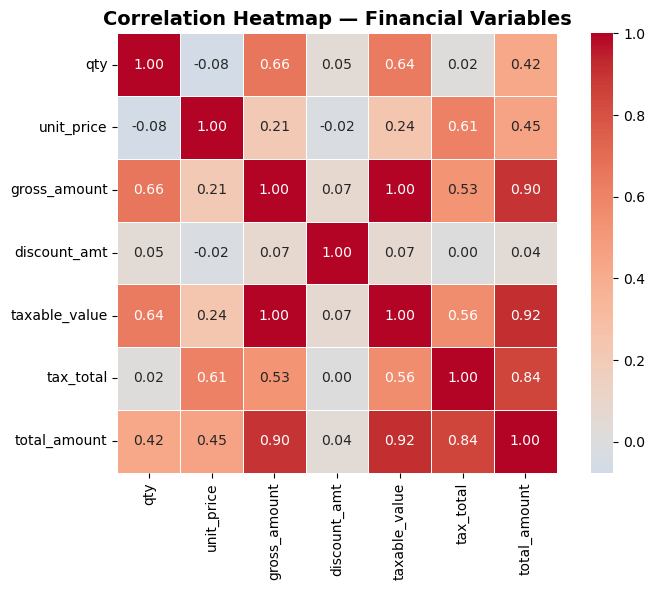

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
num_cols = ['qty', 'unit_price', 'gross_amount', 'discount_amt',
            'taxable_value', 'tax_total', 'total_amount']

corr_matrix = df[num_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, linewidths=0.5, square=True)
plt.title('Correlation Heatmap — Financial Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=150)
plt.show()


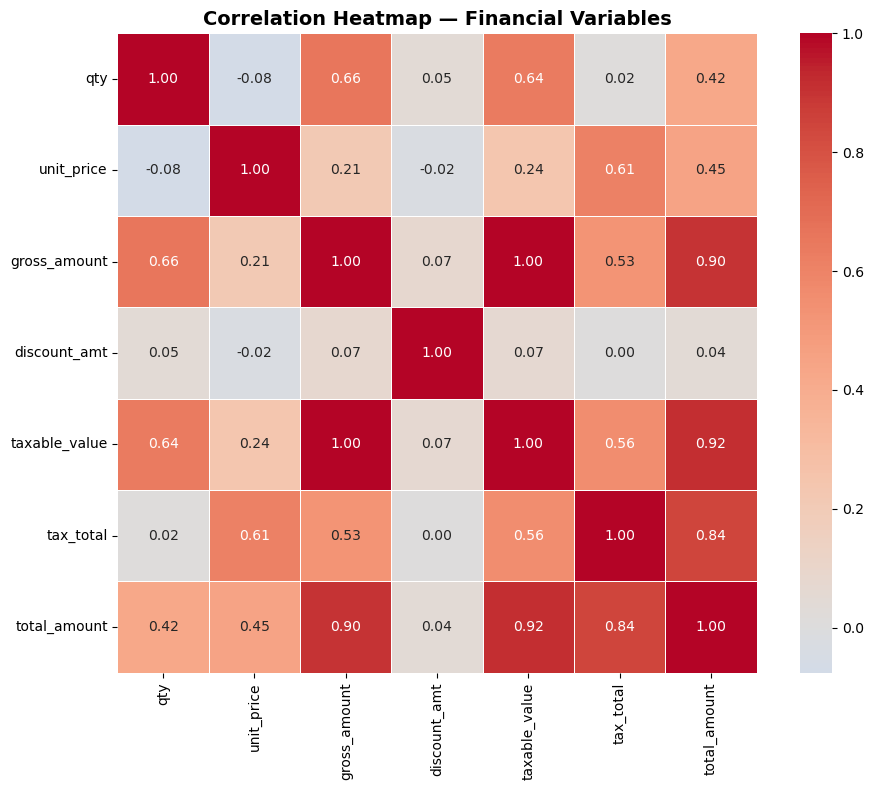

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
num_cols = ['qty', 'unit_price', 'gross_amount', 'discount_amt',
            'taxable_value', 'tax_total', 'total_amount']

corr_matrix = df[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, linewidths=0.5, square=True)
plt.title('Correlation Heatmap — Financial Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=150)
plt.show()


In [9]:
print("="*80)
print("Salesman Performance: Revenue vs. Unique Customers")
print("="*80)

Salesman Performance: Revenue vs. Unique Customers


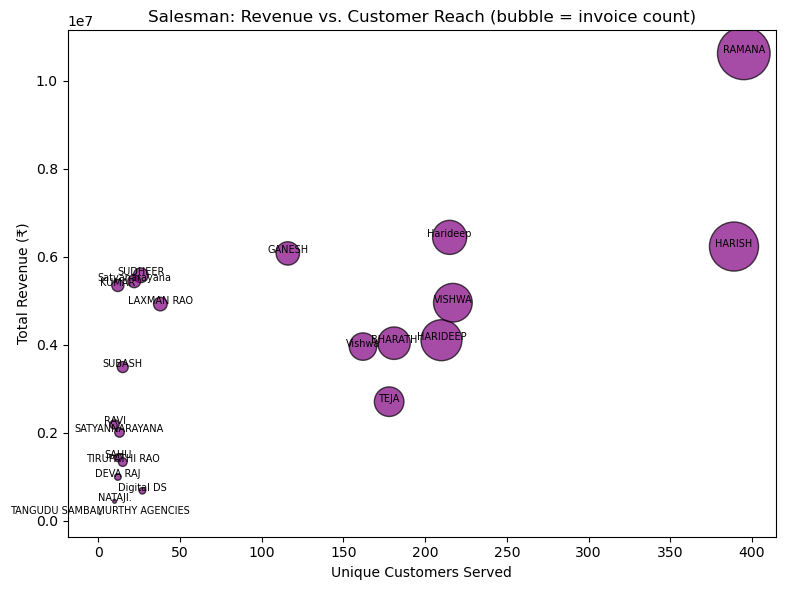

In [10]:
salesman_perf = df[df['invoice_status'] == 'Invoiced'].groupby('salesman').agg(
    total_revenue=('total_amount', 'sum'),
    unique_customers=('customer_code', 'nunique'),
    total_invoices=('invoice_no', 'nunique')
).reset_index()

plt.figure(figsize=(8, 6))
plt.scatter(salesman_perf['unique_customers'],
            salesman_perf['total_revenue'],
            s=salesman_perf['total_invoices']*0.5,
            alpha=0.7, color='purple', edgecolors='black')

for _, row in salesman_perf.iterrows():
    plt.annotate(row['salesman'], (row['unique_customers'], row['total_revenue']),
                 fontsize=7, ha='center')

plt.xlabel('Unique Customers Served')
plt.ylabel('Total Revenue (₹)')
plt.title('Salesman: Revenue vs. Customer Reach (bubble = invoice count)')
plt.tight_layout()
plt.savefig('salesman_scatter.png', dpi=150)
plt.show()


In [12]:
print("="*80)
print("Heatmap: Month × Category Revenue")
print("="*80)

Heatmap: Month × Category Revenue


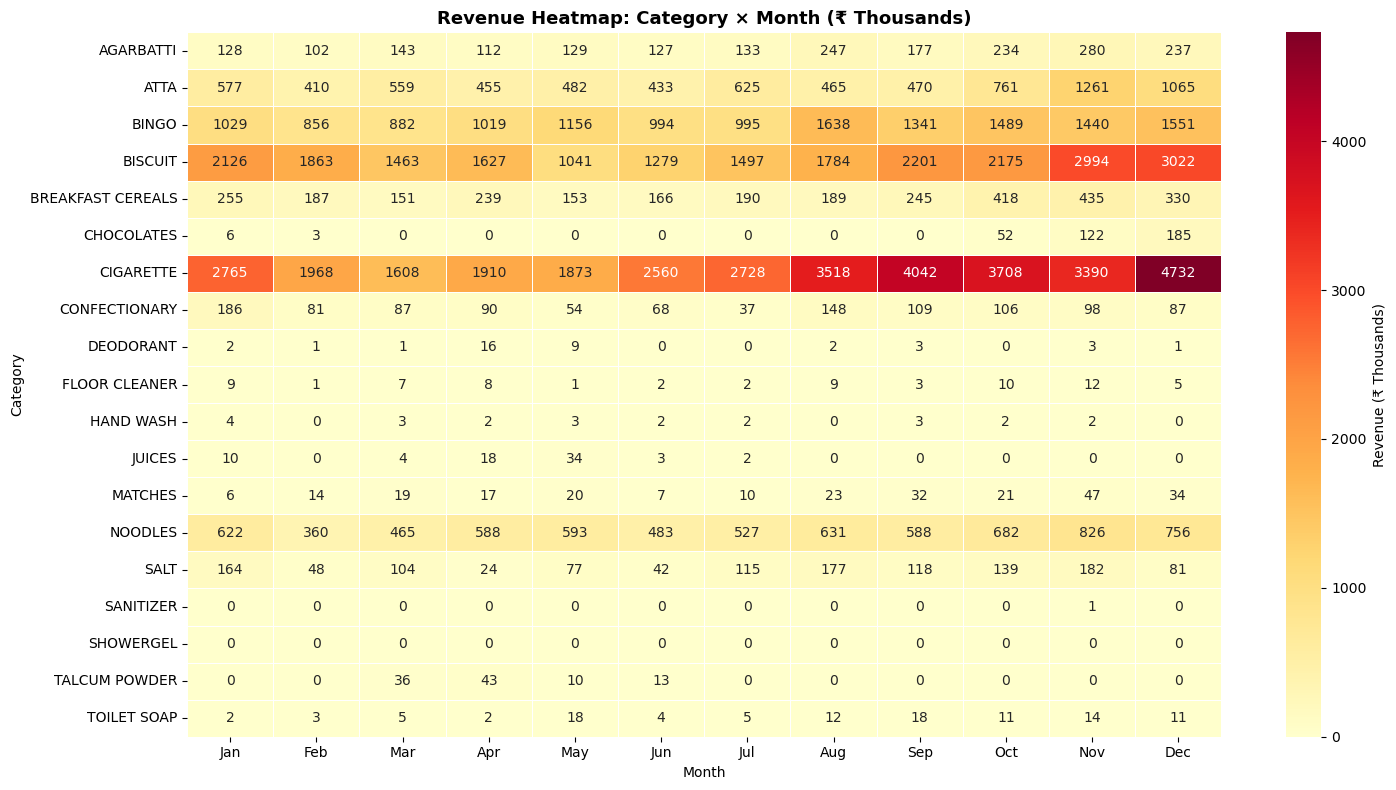

In [15]:
df['month_name'] = df['invoice_date'].dt.strftime('%b')
month_order = ['Jan','Feb','Mar','Apr','May','Jun',
               'Jul','Aug','Sep','Oct','Nov','Dec']

pivot2 = df.pivot_table(values='total_amount', index='category',
                        columns='month_name', aggfunc='sum', fill_value=0)
pivot2 = pivot2[month_order]  # reorder columns

plt.figure(figsize=(15, 8))
sns.heatmap(pivot2/1000, annot=True, fmt='.0f', cmap='YlOrRd',
            linewidths=0.5, cbar_kws={'label': 'Revenue (₹ Thousands)'})
plt.title('Revenue Heatmap: Category × Month (₹ Thousands)', fontsize=13, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Category')
plt.tight_layout()
plt.savefig('category_month_heatmap.png', dpi=150)
plt.show()

